In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
import plotly.graph_objects as go

In [3]:
# Load numpy arrays from csv
n1 = np.loadtxt('10jobs_n1.csv', delimiter=',')
n2 = np.loadtxt('10jobs_n2.csv', delimiter=',')
n3 = np.loadtxt('10jobs_n3.csv', delimiter=',')

<IPython.core.display.Javascript object>


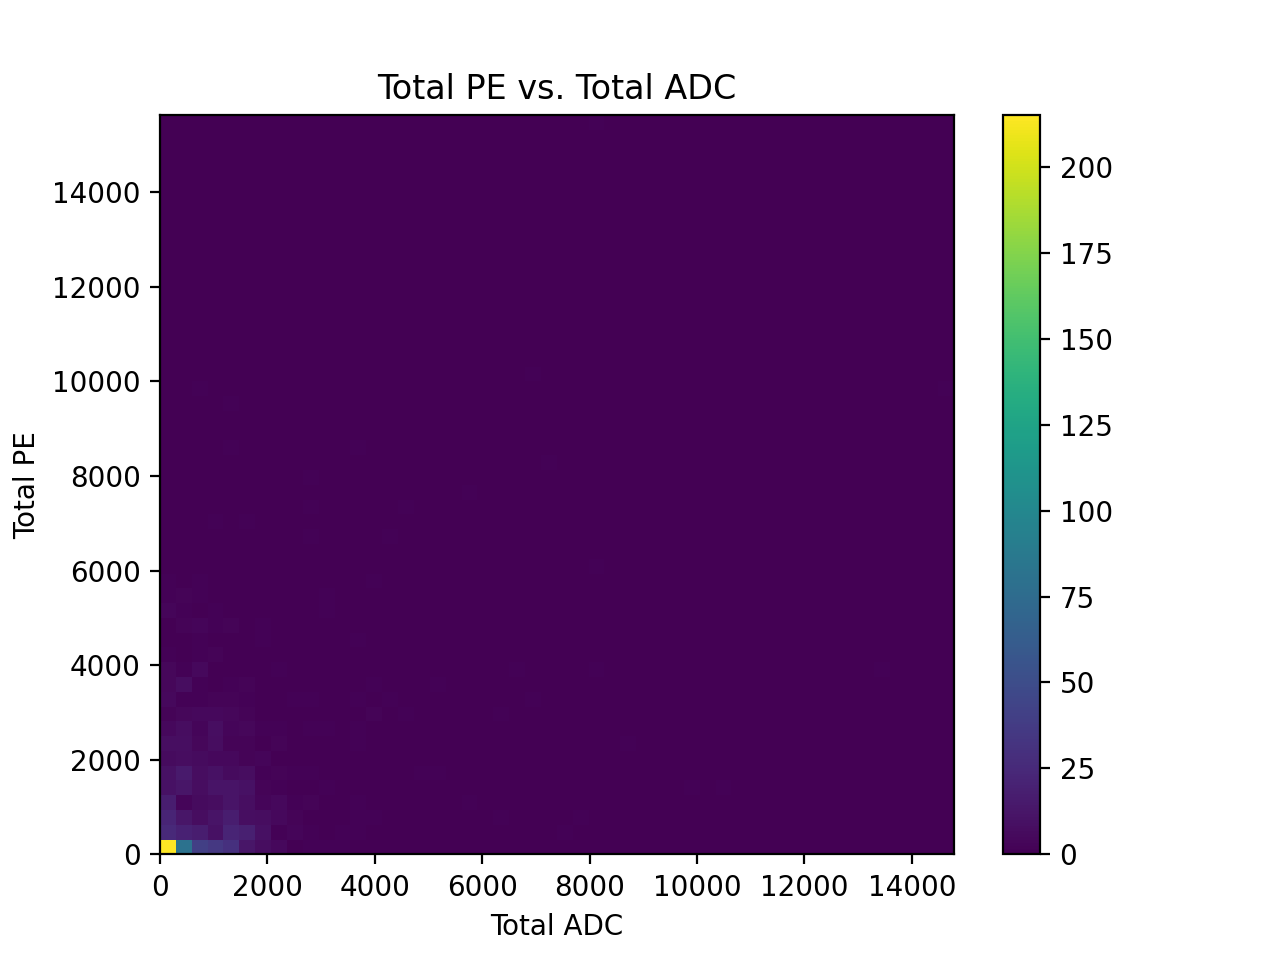

In [4]:
# 2D histogram of total PE vs. total ADC                                                                                  
plt.hist2d(n1, n3)
plt.hist2d(n1, n3, bins=(50, 50))
plt.colorbar()

# Set labels and title                                                                                                        
plt.xlabel('Total ADC')
plt.ylabel('Total PE')
plt.title('Total PE vs. Total ADC')

#plt.savefig("pe_vs_adc_50bins.jpg")
plt.show()


<IPython.core.display.Javascript object>


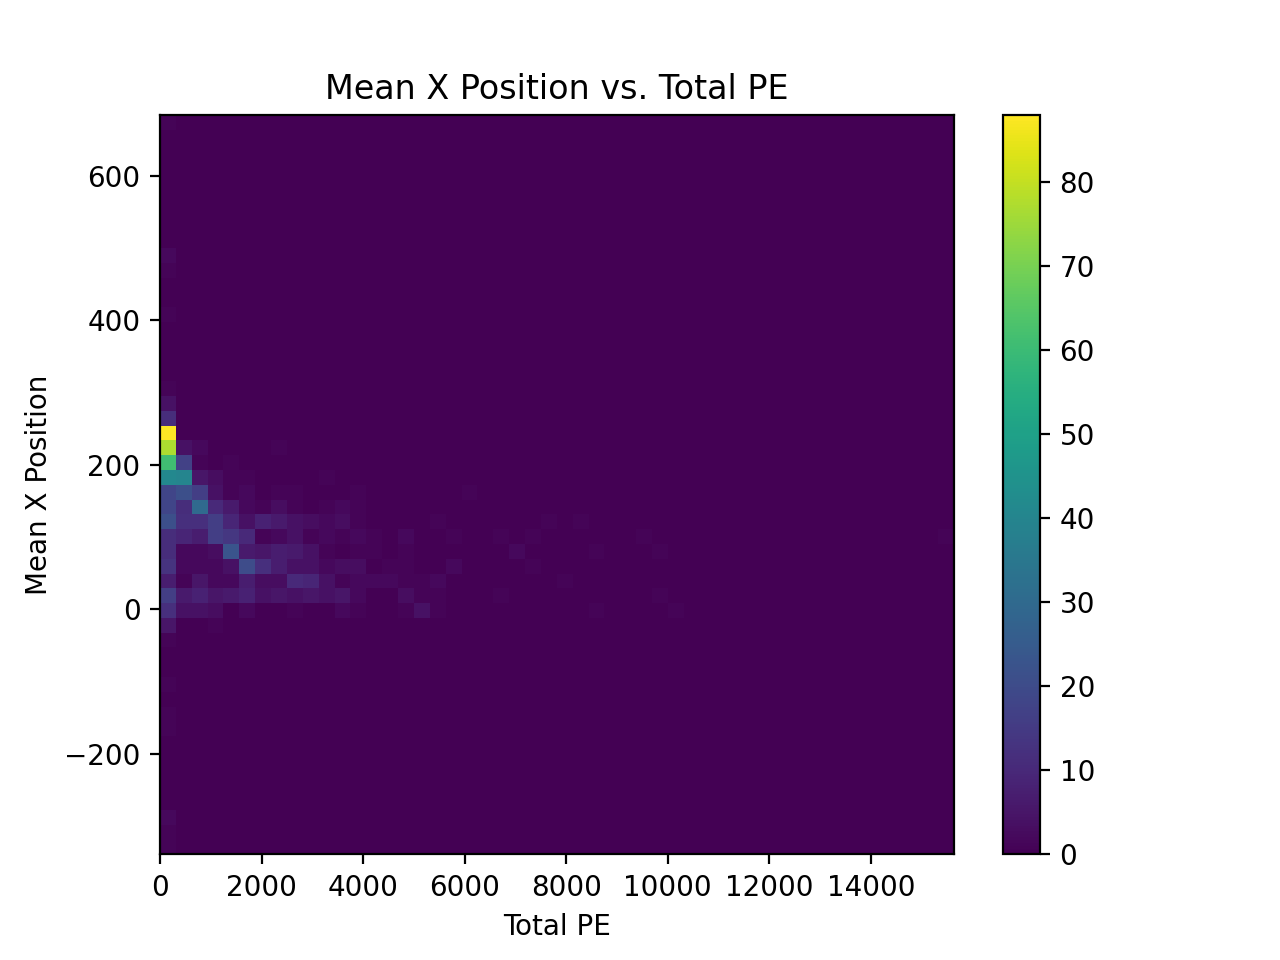

In [5]:
# 2D histogram of mean X Pos vs. total PE                                                                                  
plt.hist2d(n3, n2)
plt.hist2d(n3, n2, bins=(50, 50))
plt.colorbar()

# Set labels and title                                                                                                        
plt.xlabel('Total PE')
plt.ylabel('Mean X Position')
plt.title('Mean X Position vs. Total PE')

#plt.savefig("pe_vs_adc_50bins.jpg")
plt.show()

In [6]:
# Define the bin edges
xbins = np.linspace(np.min(n1), np.max(n1), 7)
ybins = np.linspace(np.min(n2), np.max(n2), 7)

# Compute the statistics for each bin
bin_means, xedges, yedges, binnumber = binned_statistic_2d(n1, n2, n3, statistic='mean', bins=[xbins, ybins])

<IPython.core.display.Javascript object>


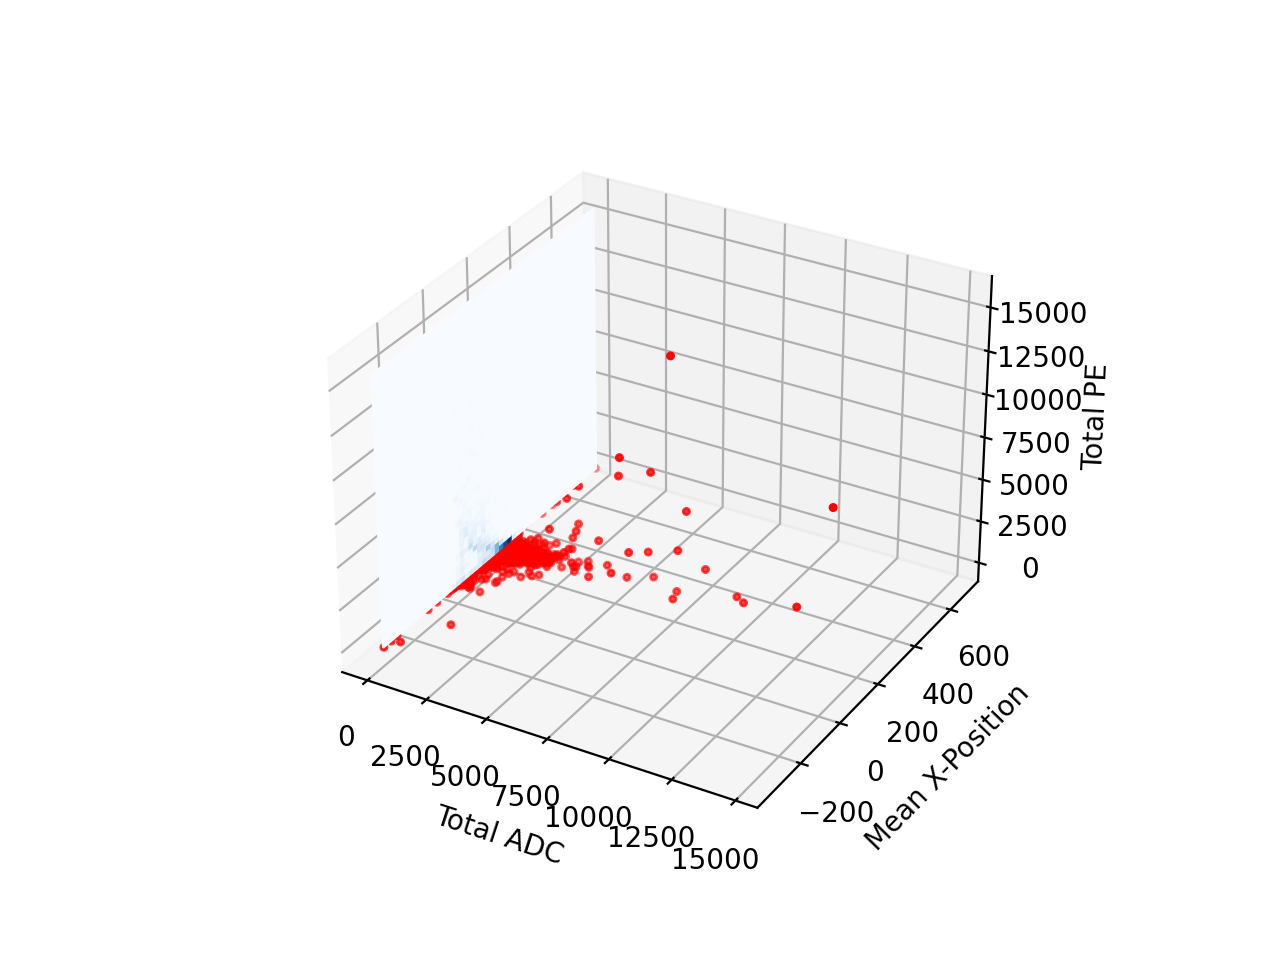

[[[0.96247597 0.98037678 0.99803153 1.        ]
  [0.96247597 0.98037678 0.99803153 1.        ]
  [0.95324875 0.97447136 0.99507882 1.        ]
  ...
  [0.96862745 0.98431373 1.         1.        ]
  [0.96862745 0.98431373 1.         1.        ]
  [0.96247597 0.98037678 0.99803153 1.        ]]

 [[0.96862745 0.98431373 1.         1.        ]
  [0.96862745 0.98431373 1.         1.        ]
  [0.96862745 0.98431373 1.         1.        ]
  ...
  [0.96862745 0.98431373 1.         1.        ]
  [0.96862745 0.98431373 1.         1.        ]
  [0.96862745 0.98431373 1.         1.        ]]

 [[0.96862745 0.98431373 1.         1.        ]
  [0.96862745 0.98431373 1.         1.        ]
  [0.96862745 0.98431373 1.         1.        ]
  ...
  [0.96862745 0.98431373 1.         1.        ]
  [0.96862745 0.98431373 1.         1.        ]
  [0.96862745 0.98431373 1.         1.        ]]

 ...

 [[0.96862745 0.98431373 1.         1.        ]
  [0.96862745 0.98431373 1.         1.        ]
  [0.96862

In [7]:
# Create a 2D plot of the binned data
#plt.pcolor(xedges, yedges, bin_means.T, cmap='viridis')
#plt.colorbar()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Total ADC')
ax.set_ylabel('Mean X-Position')
ax.set_zlabel('Total PE')

ax.scatter(n1, n2, n3, c='r', marker='.')

h, yedges, zedges = np.histogram2d(n2, n3, bins=50)
h = h.transpose()
normalized_map = plt.cm.Blues(h/h.max())
normalized_map.reshape(100,100)
print(normalized_map)

yy, zz = np.meshgrid(yedges, zedges)
xpos = min(n1)-2 # Plane of histogram
xflat = np.full_like(yy, xpos) 

p = ax.plot_surface(xflat, yy, zz, facecolors=normalized_map, rstride=1, cstride=1, shade=False)
plt.savefig("3dscatter.jpg")
plt.show()

In [8]:
my_data = np.random.rand(6500,3)  # toy 3D points
print(my_data)
marker_data = go.Scatter3d(
    x=my_data[:,0], 
    y=my_data[:,1], 
    z=my_data[:,2], 
    marker=go.scatter3d.Marker(size=3), 
    opacity=0.8, 
    mode='markers'
)

fig=go.Figure(data=marker_data)
fig.show()

[[0.88619626 0.38656732 0.70944374]
 [0.49436312 0.77301795 0.41206023]
 [0.90644932 0.20009049 0.31188282]
 ...
 [0.12610198 0.20836298 0.37159173]
 [0.20455428 0.00749285 0.85452327]
 [0.67337757 0.43178026 0.81349966]]


In [9]:
proj_n1=lambda n1, n2, n3: n1#projection in the n1-direction
colorsurfn1=proj_n1(n1,n2,n3)
print(colorsurfn1)
print(colorsurfn1.shape)

marker_data = go.Scatter3d(
    x=n1, 
    y=n2, 
    z=n3, 
    marker=go.scatter3d.Marker(size=3), 
    opacity=0.8, 
    mode='markers'
)

# Grab 2D histo for n2 + n3
h, yedges, zedges = np.histogram2d(n2, n3, bins=50)
h = h.transpose()
#print(h)
#h = h.reshape(2500,)
#print(h)
#h = h/h.max()
#print("h: ", h)
#print("h.shape: ", h.shape)

normalized_map = plt.cm.Blues(h/h.max())
#normalized_map = plt.cm.Blues(h)
#print("normalized_map: ", normalized_map)
#print("normalized_map.shape: ", normalized_map.shape)
#normalized_map = normalized_map.reshape(100,100)
#print("normalized_map reshaped: ", normalized_map)

yy, zz = np.meshgrid(yedges, zedges)
#print("yy",yy)
#print("yy.shape: ", yy.shape)
yy = yy[:-1,:-1]
#print("yy[:-1, :-1]",yy)
#print("yy[:-1, :-1].shape: ", yy.shape)
#print("zz",zz)
#print("zz.shape: ", zz.shape)
zz = zz[:-1,:-1]
#print("zz[:-1, :-1]",zz)
#print("zz[:-1, :-1].shape: ", zz.shape)
xpos = min(n1)-2 # Plane of histogram
xflat = np.full_like(yy, xpos) 
#print("xflat",xflat)
#print("xflat.shape: ", xflat.shape)

# Grab 2D histo for n1 + n3
h2, xedges, zedges2 = np.histogram2d(n1, n3, bins=50)
h2 = h2.transpose()
#print(h2)
#h = h.reshape(2500,)
#print(h)
#h = h/h.max()
#print("h: ", h)
#print("h.shape: ", h.shape)

#normalized_map = plt.cm.Blues(h/h.max())
#normalized_map = plt.cm.Blues(h)
#print("normalized_map: ", normalized_map)
#print("normalized_map.shape: ", normalized_map.shape)
#normalized_map = normalized_map.reshape(100,100)
#print("normalized_map reshaped: ", normalized_map)

xx, zz2 = np.meshgrid(xedges, zedges2)
#print("yy",yy)
#print("yy.shape: ", yy.shape)
xx = xx[:-1,:-1]
#print("yy[:-1, :-1]",yy)
#print("yy[:-1, :-1].shape: ", yy.shape)
#print("zz",zz)
#print("zz.shape: ", zz.shape)
zz2 = zz2[:-1,:-1]
#print("zz[:-1, :-1]",zz)
#print("zz[:-1, :-1].shape: ", zz.shape)
ypos = min(n2)-2 # Plane of histogram
yflat = np.full_like(xx, ypos) 
#print("xflat",xflat)
#print("xflat.shape: ", xflat.shape)


colorscale=[[0.0, 'rgb(255,255,255)'],
           [0.1, 'rgb(28,76,96)'],
           [0.2, 'rgb(16,125,121)'],
           [0.3, 'rgb(92,166,133)'],
           [0.4, 'rgb(182,202,175)'],
           [0.5, 'rgb(253,245,243)'],
           [0.6, 'rgb(230,183,162)'],
           [0.7, 'rgb(211,118,105)'],
           [0.8, 'rgb(174,63,95)'],
           [0.9, 'rgb(116,25,93)'],
           [1.0, 'rgb(51,13,53)']]

'''
z_offset=(np.min(n3)-2)*np.ones(n3.shape)#
tracez = go.Surface(z=list(z_offset),
                x=list(n1),
                y=list(n2),
                colorscale=colorscale,
                showlegend=False,
                showscale=True,
                surfacecolor=colorsurfn1,
               )
'''

data = [marker_data]
fig=go.Figure(data=data)

fig.update_layout(
    #width=1000, 
    #height=500,
    #margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis_title='Total ADC',
        yaxis_title='Mean X-Position',
        zaxis_title='Total PE',
    ),
)


'''
fig.add_traces(
    go.Surface(
        x=xflat,
        y=yy,
        z=zz,
        colorscale='Reds',
        opacity=1,
        showscale=True,
        surfacecolor=h
    )
)

fig.add_traces(
    go.Surface(
        x=xx,
        y=yflat,
        z=zz2,
        colorscale='Blues',
        opacity=1,
        showscale=False,
        surfacecolor=h2
    )
    #go.surface.Colorbar(
    #    orientation=['-0.15','2']
    #)
)
'''

fig.show()

[1480. 2194. 1356. ... 2350.    0.  634.]
(1070,)
